<font color='blue'>Привет! Итак, первый модуль почти завершен, проделана огромная работа, приобретено множество новых знаний, проведено не одно интересное исслелование, так держать! Я проверю твою работу и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (когда нужно переделать, чтобы я принял работу).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Постарайся учесть все это в дальнейших проектах.</font>

<div style="background: #deabbc">Привет! Для удобства буду писать ответы в этом цвете</div>

# Исследования рынка компьютерных игр

Для интернет-магазина компьютерных игр нужно выявить определяющие успешность игры закономерности. Есть открытые данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Исследование нужно для выбора потенциально популярного продукта и планирования рекламной кампании.

### План работы:
#### 1. Изучить общую информацию в файле с данными

#### 2. Подготовка данных
- Обработать пропуски и найти их причину
- Провести замену типов данных
- Изучить значение 'tbd'
- Посчитать суммарные продажи во всех регионах

#### 3. Провести исследовательский анализ данных
- Посмотреть, сколько игр выпускалось в разные годы.
- Посмотреть, как менялись продажи по платформам. Выберать платформы с наибольшими суммарными продажами и построить распределение по годам. Выберать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.
- Посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам.

#### 4. Составить портрет пользователя каждого региона
Определить для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Описать различия в долях продаж.
- Самые популярные жанры (топ-5). Пояснить разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### 5. Проверить гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

#### 6. Общий вывод

In [2]:
import pandas as pd
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Изучить общую информацию о данных:

### Описание данных
Name — название игры  
Platform — платформа  
Year_of_Release — год выпуска  
Genre — жанр игры  
NA_sales — продажи в Северной Америке (миллионы долларов)  
EU_sales — продажи в Европе (миллионы долларов)  
JP_sales — продажи в Японии (миллионы долларов)  
Other_sales — продажи в других странах (миллионы долларов)  
Critic_Score — оценка критиков (максимум 100)  
User_Score — оценка пользователей (максимум 10)  
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация  определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

In [3]:
games = pd.read_csv('/datasets/games.csv')
games.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Бросается в глаза то, что названия игр могут иметь какие-то вариации, как например: "Wii Sports" и "Wii Sports Resort", непонятно в каких случаях это одна и та же игра, а в каких -- отдельный выпуск. Есть пропуски в отзывах пользователей и критиков, возрастной категории.

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Год выпуска представлен типом с плавающей точкой.  
Отзыв пользоватлей - строка, хотя он в числовом формате.  
Почти половина отзывов пользователей и критиков отсутствует.  

Кроме того, посмотрим, какие градации представляет из себя возрастной рейтинг.  

In [5]:
games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

- «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше;  
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.   
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.   
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
- «EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше 
- "K-A" ("Kids to Adults") — Первоначальная версия рейтинга «E» («Everyone»)
- «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга.  
- «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет.  

<font color='green'>Открыли и изучили данные, нашли основные порблемы, хорошо.

## 2. Подготовка данных

### 2.1.  Приведение названий столбцов книжнему регистру

In [6]:
games.columns = [c.lower() for c in games.columns]
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### 2.2. Замена типов данных

<font color='blue'>А где тогда 2.2? ;)

<div style="background: #deabbc">Кажется, там тоже что-то должно было быть)
    Исправила нумерацию</div>

При попытке заменить значения пользовательского рейтинга со строки на флоат, возникла ошибка со строкой "tbd" -- "to be determined". Посмотрим, как часто он встречается. Возможно, это те же строчки, что и в столбце с возрастным рейтингом «RP» («Rating Pending») — «Рейтинг ожидается»

In [7]:
len(games.query('user_score == "tbd"'))

2424

Из 10 тыс присутствующих значений почти две с половиной -- в процессе определения.   
На платформе metacritic часто встречаются отзывы вида tbd/100 как от пользователей так и от критиков. Для этой платформы это значит, что для обозреваемого фильма должно быть как минимум 4 ревью, иначе есть опасность некорректно отразить отзывы, поэтому ставится "tbd".  
Можно принять это как идею о существовании подобной строчки в пользовательском рейтинге -- публичный источник ставит такой лейбл, когда количество отзывов недостаточно.  
Для нас это впринципе равносильно отсутствию отзывов и тем, что, возможно, игра не пользуется популярностью у пользователей, посмотрим:

In [8]:
(games
 .pivot_table(index='user_score', values=['critic_score', 'na_sales', 'eu_sales', 'jp_sales'],
              aggfunc=['median','sum', 'count']).tail(5))


median                                     sum           \
           critic_score eu_sales jp_sales na_sales critic_score eu_sales   
user_score                                                                 
9.4                88.0    0.170    0.150    0.470        957.0     3.35   
9.5                81.0    0.010    0.000    0.080        405.0     0.40   
9.6                82.0    0.085    0.055    0.220        164.0     0.17   
9.7                 NaN    0.020    0.000    0.000          0.0     0.02   
tbd                62.0    0.010    0.000    0.075      65690.0   105.49   

                                    count                             
           jp_sales na_sales critic_score eu_sales jp_sales na_sales  
user_score                                                            
9.4            2.29     7.35           11       11       11       11  
9.5            0.27     0.93            5        6        6        6  
9.6            0.11     0.44            2        2        2        2  
9.7            0.00     0.00            0        1        1        1  
tbd            6.61   305.55         1082     2424     2424     2424

(0, 0.8)

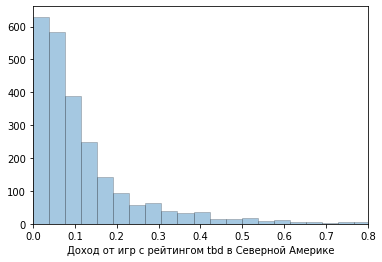

In [9]:
sns.distplot(games.query('user_score == "tbd"')['na_sales'], kde=False, bins=90,
             hist_kws=dict(edgecolor='k', linewidth=0.5),
             axlabel='Доход от игр с рейтингом tbd в Северной Америке')
plt.xlim(0, 0.8)

В основном доход таких игр не превышает 0.1 млн долларов (Северная Америка), видимо, игры были не слишком популярны. 
Для графиков и подсчетов все-таки удобнее было бы хранить данные о пользовательском рейтинге в цифрах. Мы можем заменить "tbd" на 0 -- пользователям не понравилась игра.

<div style="background: #deabbc">На самом деле, тут у меня возникли сомнения, насколько корректно заполнять tbd на ноль. Оценка ноль -- это какое-то конкретное выражение того, что не понравилось. А тут мы не знаем, как пользователи оценили игры, просто слишком мало отзывов.
    <br/>
    Может, уместнее было бы исправить на NaN?</div>

<font color='blue'>В целом очень часто в аналитике нет единого верного ответа, все часто зависит от контекста и уточненных данных. По умолчанию меняем на Nan, но мне понравилось твое обоснование именно для пользователей и я счел, что оно имеет право на жизнь.

In [10]:
games['user_score'] = games['user_score'].where(games['user_score'] != 'tbd', '0')
games['user_score'] = (pd.to_numeric(games['user_score'],
                                          downcast='float', errors='coerce'))
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null float32
rating             9949 non-null object
dtypes: float32(1), float64(6), object(4)
memory usage: 1.3+ MB


### 2.4. Обработка пропусков

Еще раз посмотрим, какие данные пропущены из 16715 записей:

In [11]:
games.isnull().sum().sort_values(ascending=False)

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
genre                 2
name                  2
other_sales           0
jp_sales              0
eu_sales              0
na_sales              0
platform              0
dtype: int64

Основные пропуски для столбцов: `critic_score`, `rating`, `user_score`
Если еще можно представить, что пользователи и критики просто не проставили рейтинг, то что тогда с пометкой возраста?  
- Может быть это не самые популярные игры, поэтому у них отсутствуют такие пометки
- Игры выходили давно

In [12]:
zero_user_score = games[games['user_score'].isnull()]
zero_user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
zero_user_score['na_sales'].describe()

count    6701.000000
mean        0.185698
std         0.800778
min         0.000000
25%         0.000000
50%         0.000000
75%         0.120000
max        29.080000
Name: na_sales, dtype: float64

In [14]:
zero_user_score['year_of_release'].describe()

count    6607.000000
mean     2004.779325
std         7.476214
min      1980.000000
25%      1999.000000
50%      2007.000000
75%      2010.000000
max      2016.000000
Name: year_of_release, dtype: float64

Это игры с небольшими суммами продаж, выпускались в разные годы. Возможно причина пропусков вполне естестственна -- это маленькие непопулярные игры. Оставим пропуски, их не заполнить каким-то характерным значением, а удалять строки совсем не хочется -- там может быть данные, которые нам пригодятся.

<font color='green'>Отлично, пропуски обработаны, а также исследованы на неслучайность.  

### 2.5. Добавить суммарные продажи во всех регионах

In [15]:
games['all_sales'] = (games['na_sales'] + games['eu_sales'] +
                      games['jp_sales'] + games['other_sales'])

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<font color='green'>Ну тут все просто.

## 3. Исследовательский анализ
### 3.1 Определить актуальный период для данных, с помощью которых можно будет построить прогноз на 2017

Выберем самые продаваемые игры и посмотрим, как продажи менялись с годами по платформам. Для этого найдем сумму продаж для каждой платформы и количество выпускаемых в год игр.

In [16]:
platforms_sales = games.pivot_table(index='platform', values='all_sales', aggfunc='sum')
platforms_sales.sort_values(by='all_sales', ascending=False)


,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Выберем платформы, у которых были продажи больше 80 млн.

In [17]:
platforms_sales = platforms_sales.query('all_sales > 80')

In [18]:
successed_games = games.query('platform in @platforms_sales.index')

Посмотрим, сколько выпускалось игр по годам

In [19]:
years = games.pivot_table(index='year_of_release', values=['name'], aggfunc='count')
years.reset_index(inplace=True)
years.columns = ['year_of_release', 'quantity']



Выведем графики

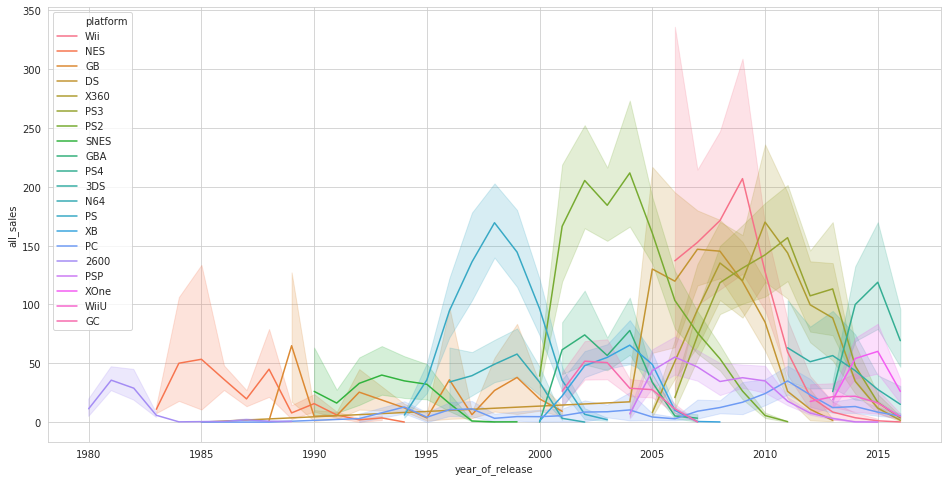

In [20]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games, estimator=sum))

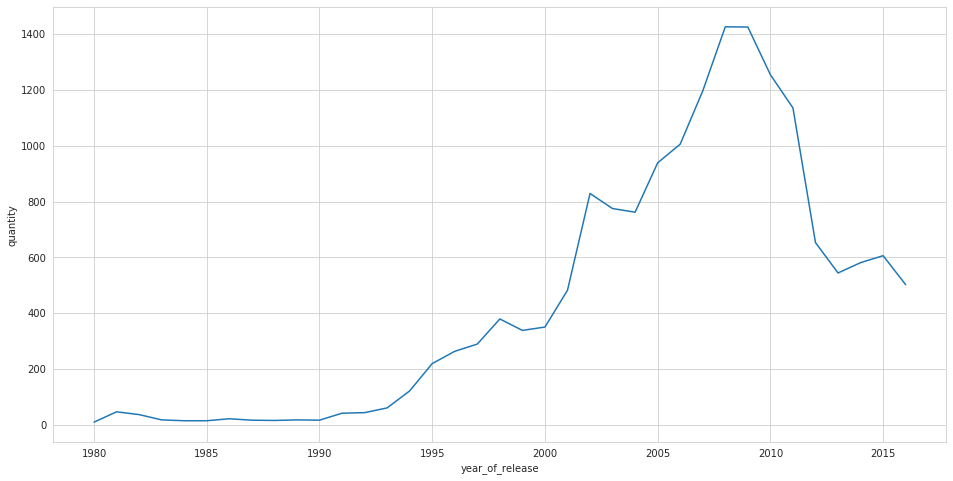

In [21]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
sns.lineplot(x="year_of_release", y="quantity", data=years)

После примерно 2009 производство игр, начало резко падать. Возможно это связано с тем, что всю большую популярность получили игры, которые не требуют игры на какой-то платформе: игры, в которые можно играть с телефона, компьютера.  
Рассмотрим некоторые фрагменты графика с платформами, чтобы лучше понять их жизненный цикл и выбрать актуальный для нас период.

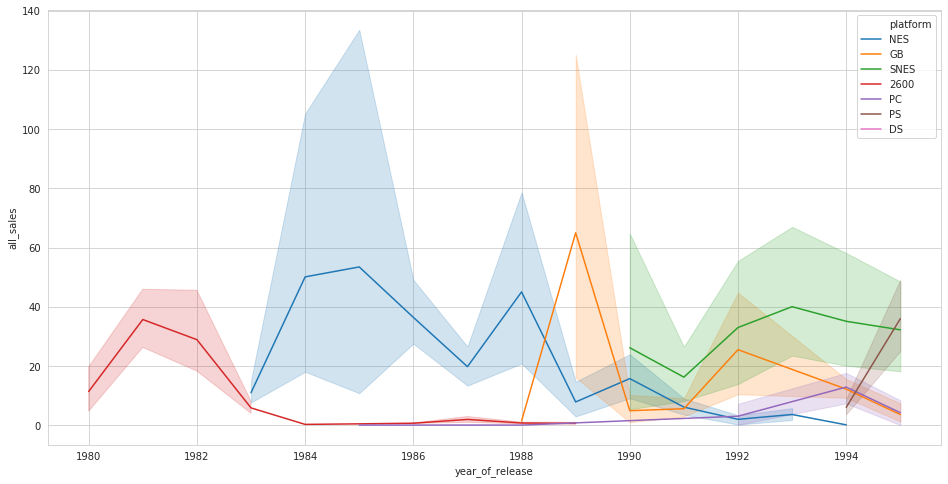

In [22]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('year_of_release <= 1995'), estimator=sum))

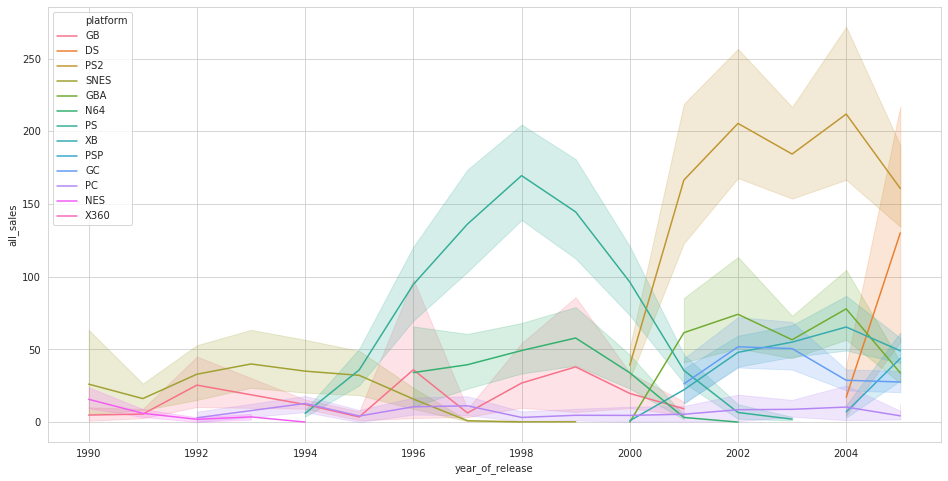

In [23]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('1990 <= year_of_release <= 2005'), estimator=sum))

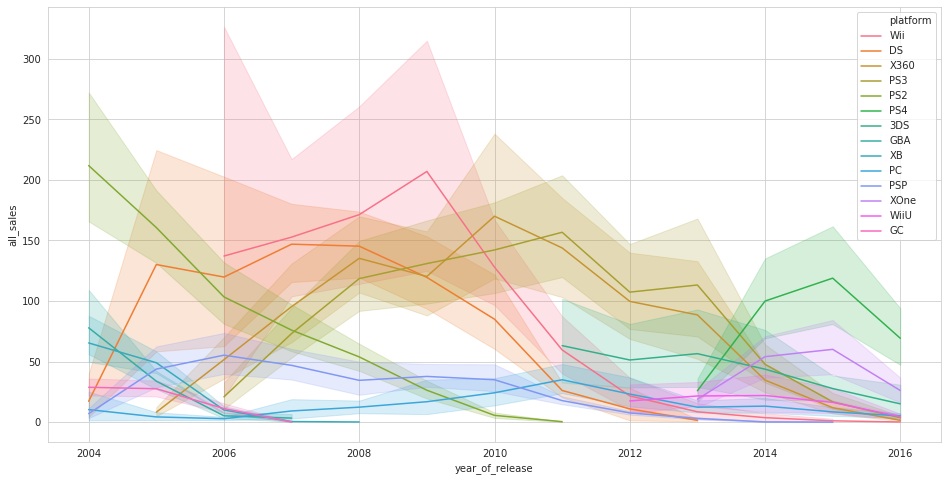

In [24]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('2004 <= year_of_release <= 2016'), estimator=sum))

8, 10, 12 лет -- примерно так живут платформы. Как правило, это графики-горки с набором объемов продаж, а затем и спадом. Судя по графику количества выпускаемых игр в год, произошло резкое падение количества игр с 2009 по 2013 год. За это время ушли ps2, ps3, ps4, ds, wii. В качестве периода, на основании которго нужно будет строить прогноз на 2017 год, возьмем отрезок с 2014 года включительно. Это точка после которой закончился резкий спад выпуска игр (хотя возможно так или иначе он продолжается), примерно к этому году пришли к спаду многие платформы и началось развитие нескольких других (ps4, Xone)

<font color='green'>Верно. На твоих графиках отчетливо виден новый виток эволюции платформ в этот период.

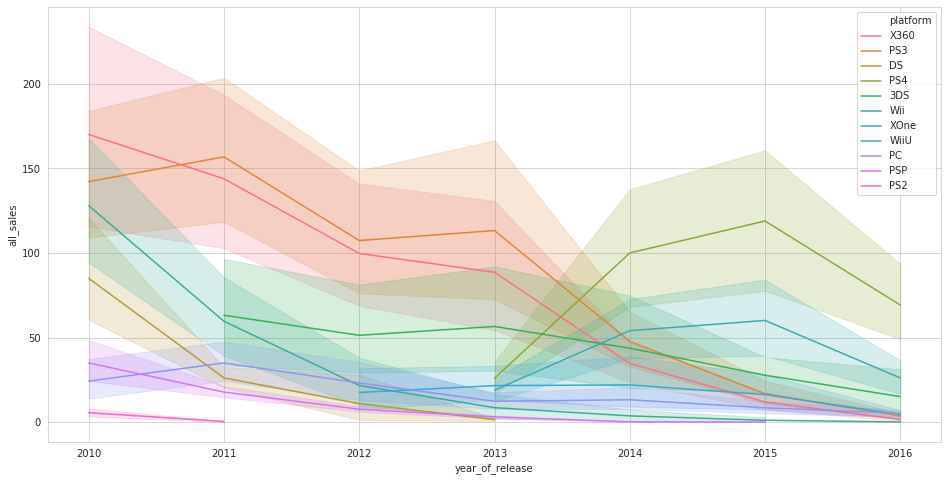

In [25]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
(sns.lineplot(x='year_of_release', y='all_sales', hue='platform',
              data=successed_games.query('2010 <= year_of_release <= 2016'), estimator=sum))

In [26]:
actual_games = games.query('year_of_release >= 2014')

### 3.2.  Выделить потенциально прибыльные платформы и исследовать продажи

In [27]:
grouped_platforms = actual_games.pivot_table(index=['platform'], values='all_sales', aggfunc='sum')
grouped_platforms.sort_values(by='all_sales', ascending=False)

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Еще раз посмотрим на график продаж по платформам с 2010 по 2016 год. Видно, что к 2016 году, окончательно ушло большое количество платформ, появившихся новых всего две, и продажи по ним уже тоже перевалили пик. Судя по тенденциям графика платформы-продажи предыдущих периодов, в таком состоянии в 2017 году может появиться новый игрок. Судя по графику, даже новых игроков 2013 года сложно назвать потенциально прибыльными. ps4, XOne - новые платформы, которые возможно уже пережили свой пик, 3DS - уже в стадии ухода. Тем не менее, придется считать их наиболее перспективными.

Посмотрим на продажи поигрово для 
### перспективных (ps4, XOne, 3DS), 
сгруппированные по платформам:

<font color='blue'>Можно еще добавить "бессмертный" PC

In [28]:
perspective_platforms = actual_games[actual_games['platform'].isin(['PS4', 'XOne', '3DS'])]

[(0, 1.6)]

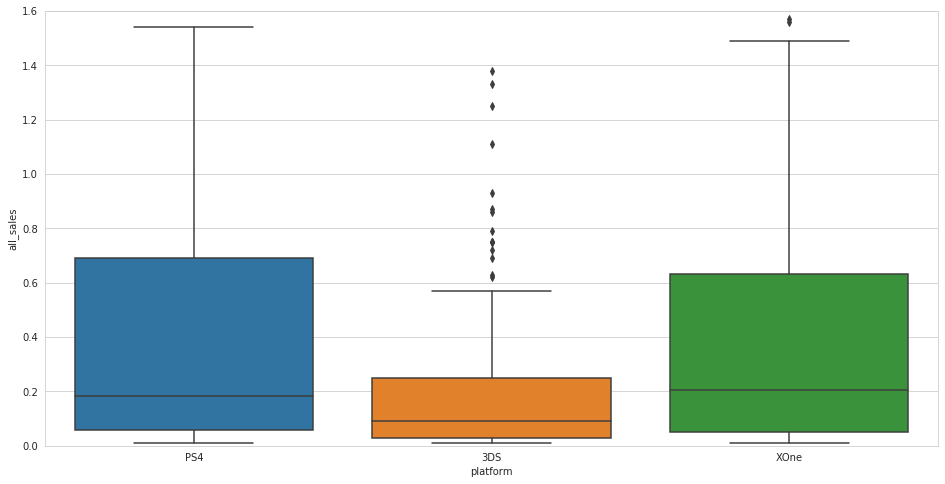

In [29]:
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='all_sales', data=perspective_platforms).set(ylim=(0, 1.6))

<s><font color='brown'>Ну мы же умеем делать подходящий масштаб, ylim, всё такое. Визуально кроме выбросов почти ничего не вижу.

<div style="background: #deabbc">Умеем!
    <br/>
    На пару абзацев ниже, вывожу те же графики с ylim.
    Тут хотелось оставить хвосты большие, скорее, чтобы в общем понять, что с продажами в играх все неравномерно.
    <br/>
    Тут сейчас тоже исправила.
</div>

In [30]:
(perspective_platforms.pivot_table(index='platform', values='all_sales',
                                   aggfunc=['mean', 'median', 'count']))

,mean,median,count
,all_sales,all_sales,all_sales
platform,,,
3DS,0.408868,0.090,212
PS4,0.766356,0.185,376
XOne,0.615614,0.205,228


Самые большые выбросы у ps4, что вобщем логично, на этой платформе и игр больше, и тут может быть, что одна, две игры продающие, продажи от какой-то даже привысили 14 миллионов (внизу показаны эти игры). 3ds - уходящая платформа, у нее и меньше средняя продажа и продажи самых успешных игр не превышают 4 млн. Если представить то, что игры могут выходить на всех трех платформах, то ps4 судя по графику и средним продажам самая успешная, далее xOne -- средние продажи у них не сильно отличаются, но у ps4 есть свои игры "звезды", которые в итоге и делают большую прибыли в совокупности по всей платформе.

In [31]:
popular_games = (perspective_platforms[perspective_platforms['all_sales'] > 6]
                 .sort_values(by='all_sales', ascending=False))
popular_games[['name','platform', 'genre', 'all_sales']]

,name,platform,genre,all_sales
31,Call of Duty: Black Ops 3,PS4,Shooter,14.63
42,Grand Theft Auto V,PS4,Action,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,Role-Playing,11.68
77,FIFA 16,PS4,Sports,8.58
87,Star Wars Battlefront (2015),PS4,Shooter,7.98
92,Call of Duty: Advanced Warfare,PS4,Shooter,7.66
94,FIFA 17,PS4,Sports,7.60
96,Super Smash Bros. for Wii U and 3DS,3DS,Fighting,7.55
99,Call of Duty: Black Ops 3,XOne,Shooter,7.39
105,Fallout 4,PS4,Role-Playing,7.17


### 3.3. Рассмотреть влияние отзывов пользователей на продажи внутри одной платформы
Возьмем данные пл перспективным платформам, очистим от выбросов, построим графики корреляции продаж с оценками критиков и зрителей

[(0, 1.6)]

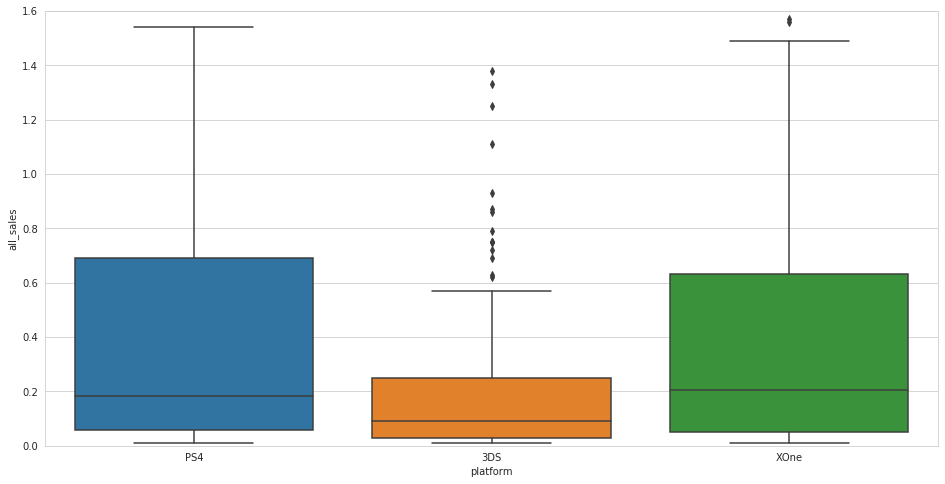

In [32]:
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='all_sales', data=perspective_platforms).set(ylim=(0, 1.6))

#### 3.3.1 PS4

Не будем учитывать выбросы, для ps4 - это продажи выше 1.55 млн

In [33]:
prepared_ps4 = (perspective_platforms[(perspective_platforms['platform'] =='PS4') &
                                           (perspective_platforms['all_sales'] <= 1.55)])
len(prepared_ps4)

323

Основная доля продаж на платформе ps4 приходится на суммы в пределах 0.1 млн. Построим графики корреляции для очищенной и неочищенной таблицы

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


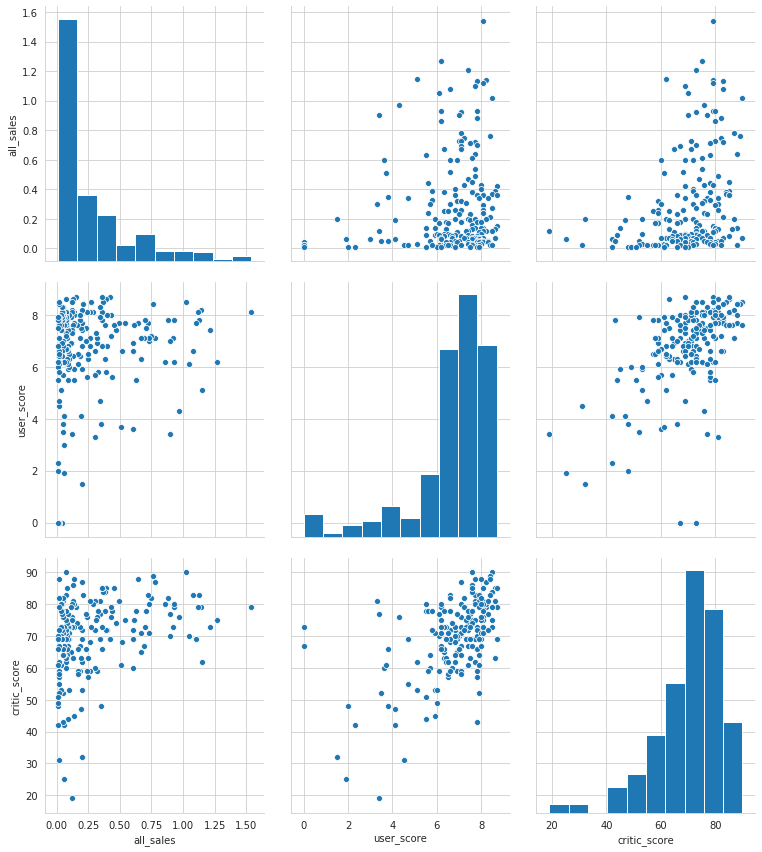

In [34]:
(sns.pairplot(prepared_ps4, height=4, aspect=.9,
              vars=["all_sales", "user_score", "critic_score"]))


In [35]:
prepared_ps4['all_sales'].corr(prepared_ps4['user_score'])


0.1281612674672993

In [36]:
prepared_ps4['all_sales'].corr(prepared_ps4['critic_score'])


0.31430480777798225

Отзывы пользователей для платформы в основном больше 5, тем не менее, наибольшая концентрация на графике приходится в области продаж до 0.2 млн. С рейтингом критиков примерно такая же ситуация.

<font color='brown'>Так, а где же обещанный графики для неочищенной таблицы? Как же мы самые суперхиты не оценим? Нам же интересно, какие были оценки у игр, собравших 3+ млн? Возможно, мы увидим что-то интересное, касаемо оценок суперхитовых игр. Достаточно сделать по PS4.

<div style="background: #deabbc">Добавляю! <br/>(а ведь тут действительно был такой абзац, остался один заголовок)</div>

#### 3.3.1.1 PS4 - хвост

In [37]:
tail_ps4 = (perspective_platforms[(perspective_platforms['platform'] =='PS4') &
                                           (perspective_platforms['all_sales'] >= 3)])
len(tail_ps4)

25

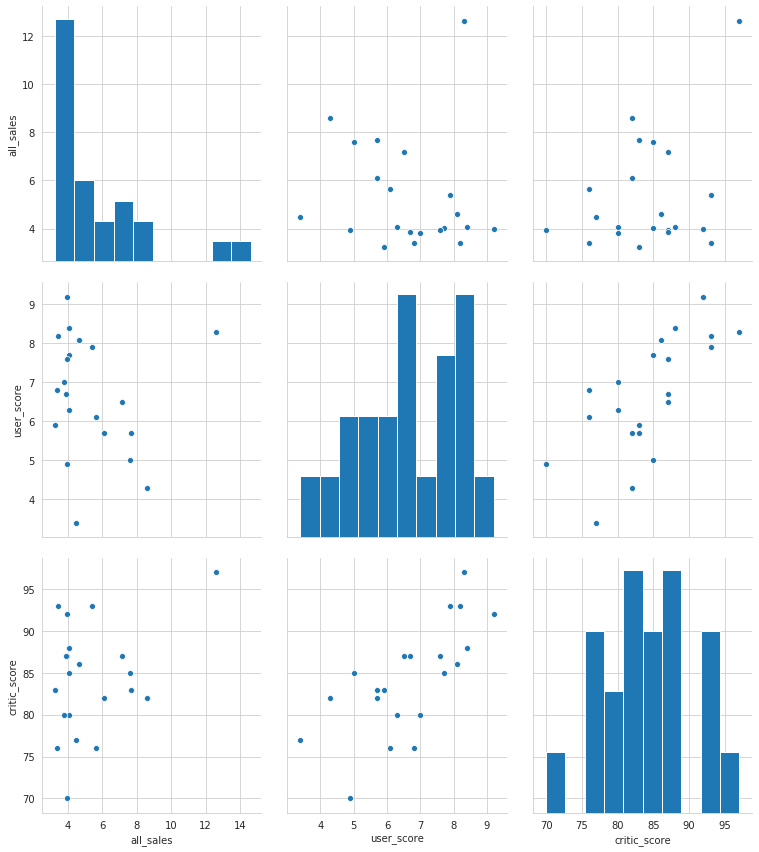

In [38]:
(sns.pairplot(tail_ps4, height=4, aspect=.9,
              vars=["all_sales", "user_score", "critic_score"]))

In [39]:
tail_ps4['all_sales'].corr(tail_ps4['user_score'])

-0.12495758651765175

In [40]:
tail_ps4['all_sales'].corr(tail_ps4['critic_score'])

0.33148760796174614

Для звездных игр на ps4 распределение отзывов пользователей уже не так скошено в высокие оценки, и оценки критиков распределены равномерно. По-прежнему сложно сказать что-то о явном влиянии оценок критиков и пользователей на продажи.

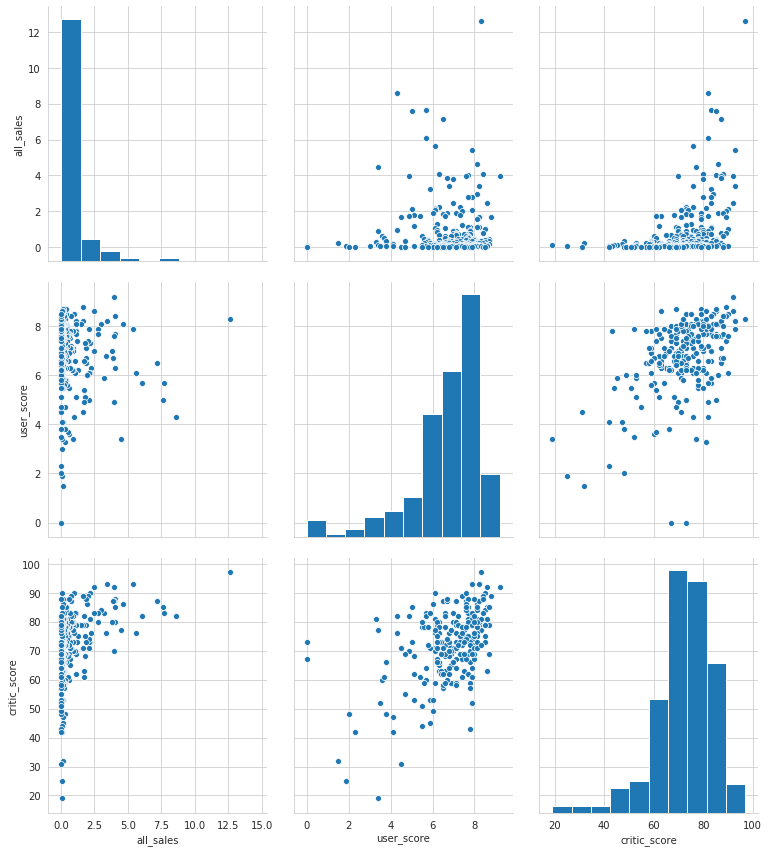

In [42]:
all_ps4 = (perspective_platforms[(perspective_platforms['platform'] =='PS4')])
(sns.pairplot(all_ps4, height=4, aspect=.9,
              vars=["all_sales", "user_score", "critic_score"]))

<b><font color='blue'>А если посмотреть данные за все игры, видно, что ни одна игра с рейтингом меньне 7 не стала хитом продаж. Или наоборот, ни один хит не оплучил меньше 7.

#### 3.3.2 XOne

In [38]:
cleared_XOne = (perspective_platforms[(perspective_platforms['platform'] =='XOne') &
                                           (perspective_platforms['all_sales'] <+ 1.5)])

Здесь тоже продажи приходятся в основном по 0.1 млн

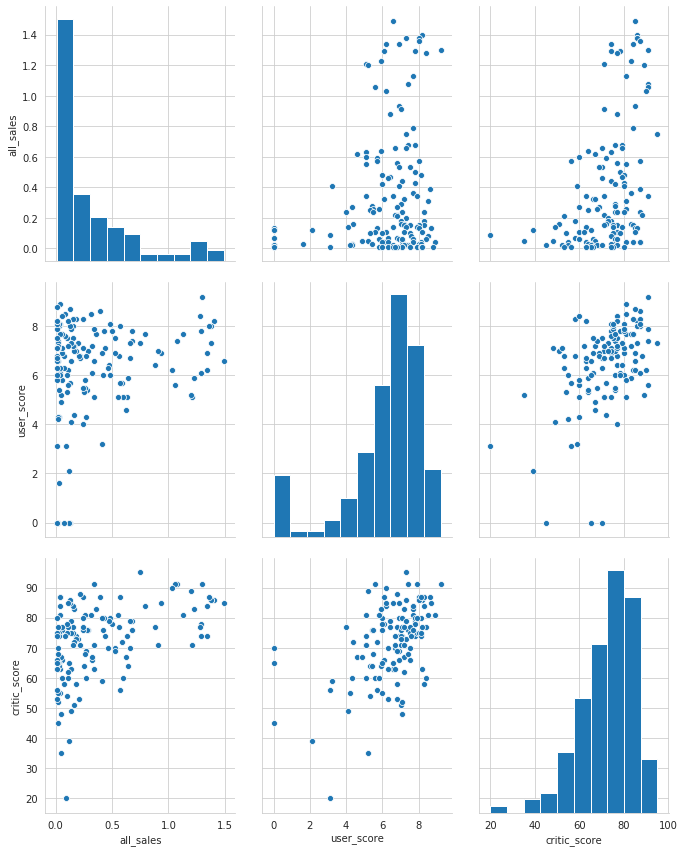

In [39]:
(sns.pairplot(cleared_XOne, height=4, aspect=.8,
              vars=["all_sales", "user_score", "critic_score"]))


In [40]:
cleared_XOne['all_sales'].corr(cleared_XOne['user_score'])


0.21384545647899061

In [41]:
cleared_XOne['all_sales'].corr(cleared_XOne['critic_score'])

0.44858649637186604

#### 3.3.3 3DS

In [42]:
cleared_3DS = (perspective_platforms[(perspective_platforms['platform'] =='3DS') &
                                           (perspective_platforms['all_sales'] < 0.6)])

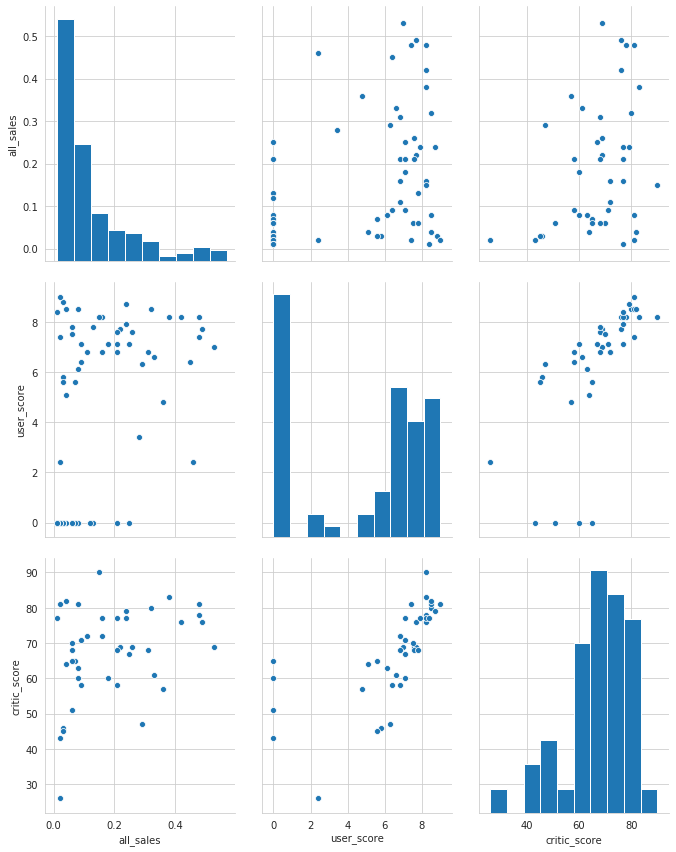

In [43]:
(sns.pairplot(cleared_3DS, height=4, aspect=.8,
              vars=["all_sales", "user_score", "critic_score"]))

In [44]:
cleared_3DS['all_sales'].corr(cleared_3DS['user_score'])


0.41065628855924985

In [45]:
cleared_3DS['all_sales'].corr(cleared_3DS['critic_score'])

0.33369448755844106

Для 3ds видна полоска с рейтингом пользователей 0, видимо это тот самый результат обработки tbd.
Для всех платформ основная сумма продажи 0.1, продажи не имеют убедительной кореляции с рейтингами. Однако для ps4 и Xone рейтинги критиков более влиятельные, чем пользователей. Возможно рейтинги вообще появляются позднее (как минимум пользователей), когда уже успевают в нее поиграть и, следовательно, купить. И возможно, игры, вышедшие давно, покупает гораздо меньше людей, чем только когда они выходят, поэтому невозможно оценить влияние рейтинга

### 3.4. Исследование жанров
Посмотреть на распределение игр по жанрам, жанрам с высокими и низкими продажами.

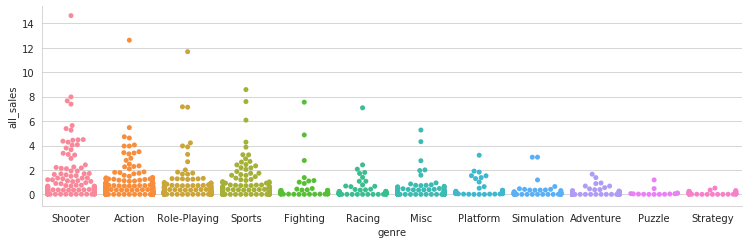

In [46]:
(sns.catplot(y="all_sales", x="genre", kind="swarm",
             height=3.5, aspect=3,
             data=actual_games))

Выделяется группа игр с высоким доходом: shooter, action, role-playing, sports. Продажы от каждой игры здесь держаться в основном диапазоне до 2 миллионов.  
Посмотрим, сколько ссуммарно приносят жанры, каковы медианные значения продаж одной игры, количество выпускаемых игр по жанрам.

In [47]:
genre_grouped = (actual_games
                 .pivot_table(index='genre', values=['all_sales'],
                              aggfunc=['median', 'mean', 'count', 'sum']))
genre_grouped.columns = ['median_sales', 'mean_sales','genre_count', 'sum_sales']
genre_grouped.sort_values(by='median_sales', ascending=False)

,median_sales,mean_sales,genre_count,sum_sales
genre,,,,
Shooter,0.515,1.335469,128,170.94
Sports,0.180,0.680000,161,109.48
Platform,0.140,0.476053,38,18.09
Fighting,0.125,0.470333,60,28.22
Role-Playing,0.110,0.459005,221,101.44
Simulation,0.100,0.298409,44,13.13
Action,0.090,0.322068,619,199.36
Misc,0.090,0.332301,113,37.55
Racing,0.090,0.398841,69,27.52


Самые прибыльные игры - шутеры. Их меньше производится, но медианная продажа у них самая высокая (и средняя тоже из-за выбросов). Затем идут жанры sports, platform (разновидность экшена), fighting, role-playing.  
puzzle и adventure -- самые малоприбыльные.

<font color='green'>Таблицы, графики, выводы, все четко.

## 4. Составить портрет пользователя каждого региона
для каждого региона (NA, EU, JP)

In [48]:
def list_popular(parametr, region_sales):
    print('Распределение: ', parametr, 'по', region_sales )
    g = (sns.catplot(y=region_sales, x=parametr, kind="swarm", height=4, aspect=3,
                 data=actual_games.sort_values(by=region_sales, ascending=False)))
    (g.set_axis_labels(parametr, region_sales).set_titles('Title'))
    plt.show()

    print('Самые популярные 5 игр по:', parametr, 'для', region_sales )
    print('---------------------------------------------')
     
    print(actual_games
     .pivot_table(index=parametr, values=region_sales,
                  aggfunc=['mean', 'median', 'count', 'sum'])
     .sort_values(by=( 'sum', region_sales), ascending=False))
    print('')
    print('')
    print('-----------------------------------------------------------------------------------')
    print('')
    print('')

### 4.1. Самые популярные платформы (топ-5)

Распределение:  platform по na_sales


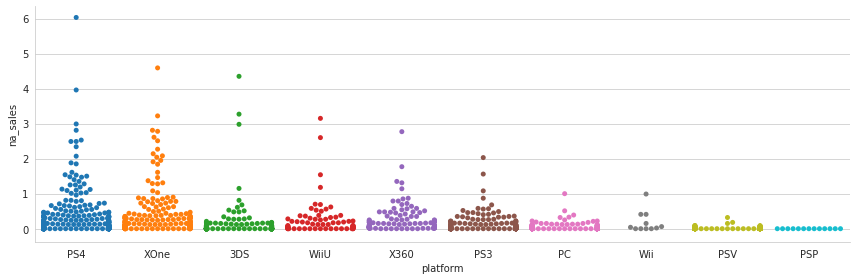

Самые популярные 5 игр по: platform для na_sales
---------------------------------------------
              mean   median    count      sum
          na_sales na_sales na_sales na_sales
platform                                     
PS4       0.262261     0.05      376    98.61
XOne      0.356447     0.10      228    81.27
X360      0.254955     0.10      111    28.30
3DS       0.106792     0.00      212    22.64
PS3       0.100685     0.02      219    22.05
WiiU      0.265205     0.09       73    19.36
PC        0.047881     0.00      151     7.23
PSV       0.008542     0.00      295     2.52
Wii       0.189091     0.04       11     2.08
PSP       0.000000     0.00       13     0.00


-----------------------------------------------------------------------------------


Распределение:  platform по eu_sales


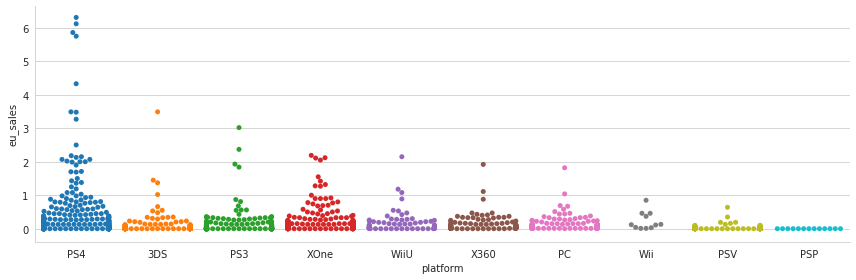

Самые популярные 5 игр по: platform для eu_sales
---------------------------------------------
              mean   median    count      sum
          eu_sales eu_sales eu_sales eu_sales
platform                                     
PS4       0.345851     0.07      376   130.04
XOne      0.202851     0.07      228    46.25
PS3       0.116621     0.01      219    25.54
PC        0.119007     0.05      151    17.97
3DS       0.076038     0.00      212    16.12
X360      0.139550     0.05      111    15.49
WiiU      0.180137     0.06       73    13.15
PSV       0.011966     0.00      295     3.53
Wii       0.235455     0.12       11     2.59
PSP       0.000000     0.00       13     0.00


-----------------------------------------------------------------------------------


Распределение:  platform по jp_sales


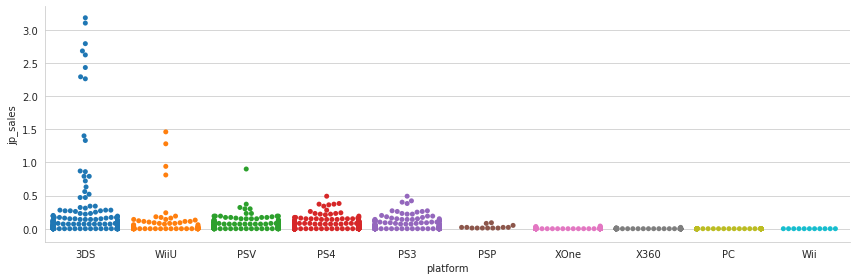

Самые популярные 5 игр по: platform для jp_sales
---------------------------------------------
              mean   median    count      sum
          jp_sales jp_sales jp_sales jp_sales
platform                                     
3DS       0.208679    0.055      212    44.24
PS4       0.039947    0.015      376    15.02
PSV       0.049288    0.030      295    14.54
PS3       0.051233    0.020      219    11.22
WiiU      0.100137    0.010       73     7.31
PSP       0.027692    0.020       13     0.36
XOne      0.001404    0.000      228     0.32
X360      0.000721    0.000      111     0.08
PC        0.000000    0.000      151     0.00
Wii       0.000000    0.000       11     0.00


-----------------------------------------------------------------------------------




In [49]:
reg_popular_platforms = [('platform', 'na_sales'), ('platform', 'eu_sales'), ('platform', 'jp_sales')]
for pair in reg_popular_platforms:
    list_popular(*pair)

Почему-то не вышло корректно справится с сортировкой графиков, по крайней мере, визуально, кажется, что фигуры не упорядочены по убыванию.  
Тем не менее, Японский рынок отличается отстуствием лидерства ps4, хотя на североамериканском и европейском рынках у нее значительное лидерство. В Японии популярнее платформа Nintendo 3ds (ведь она японского производства!), далее идет армия ps. PS4 тотально доминирует в Европе. В Северной Америке так же популярен xbox.

### 4.2. Самые популярные жанры (топ-5)

Распределение:  genre по na_sales


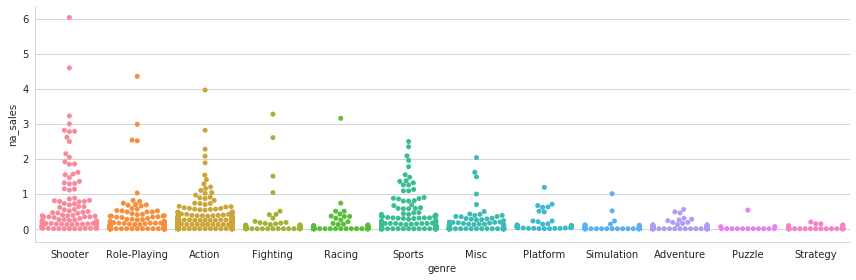

Самые популярные 5 игр по: genre для na_sales
---------------------------------------------
                  mean   median    count      sum
              na_sales na_sales na_sales na_sales
genre                                            
Shooter       0.617344    0.220      128    79.02
Action        0.117173    0.010      619    72.53
Sports        0.286522    0.070      161    46.13
Role-Playing  0.151448    0.020      221    33.47
Misc          0.133186    0.010      113    15.05
Fighting      0.207167    0.040       60    12.43
Racing        0.126667    0.030       69     8.74
Platform      0.178684    0.075       38     6.79
Adventure     0.030486    0.000      185     5.64
Simulation    0.059773    0.000       44     2.63
Strategy      0.026486    0.000       37     0.98
Puzzle        0.046429    0.000       14     0.65


-----------------------------------------------------------------------------------


Распределение:  genre по eu_sales


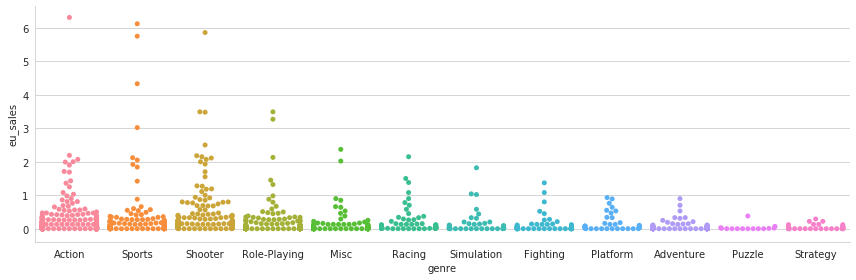

Самые популярные 5 игр по: genre для eu_sales
---------------------------------------------
                  mean   median    count      sum
              eu_sales eu_sales eu_sales eu_sales
genre                                            
Action        0.120646    0.020      619    74.68
Shooter       0.511875    0.220      128    65.52
Sports        0.284037    0.050      161    45.73
Role-Playing  0.127466    0.010      221    28.17
Racing        0.204783    0.050       69    14.13
Misc          0.113805    0.010      113    12.86
Simulation    0.165909    0.030       44     7.30
Platform      0.178947    0.055       38     6.80
Fighting      0.111500    0.020       60     6.69
Adventure     0.035081    0.000      185     6.49
Strategy      0.048378    0.010       37     1.79
Puzzle        0.037143    0.000       14     0.52


-----------------------------------------------------------------------------------


Распределение:  genre по jp_sales


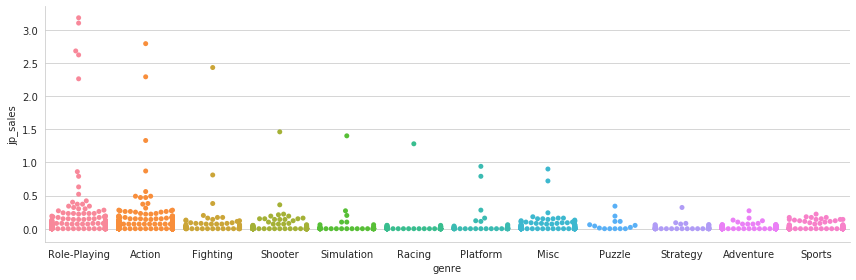

Самые популярные 5 игр по: genre для jp_sales
---------------------------------------------
                  mean   median    count      sum
              jp_sales jp_sales jp_sales jp_sales
genre                                            
Role-Playing  0.140995     0.05      221    31.16
Action        0.047787     0.01      619    29.58
Fighting      0.106167     0.03       60     6.37
Misc          0.049646     0.01      113     5.61
Shooter       0.038047     0.00      128     4.87
Adventure     0.019459     0.01      185     3.60
Sports        0.020248     0.00      161     3.26
Platform      0.070789     0.00       38     2.69
Simulation    0.052500     0.00       44     2.31
Racing        0.025507     0.00       69     1.76
Strategy      0.025676     0.00       37     0.95
Puzzle        0.066429     0.03       14     0.93


-----------------------------------------------------------------------------------




In [50]:
reg_popular_genres = [('genre', 'na_sales'), ('genre', 'eu_sales'), ('genre', 'jp_sales')]
for pair in reg_popular_genres:
    list_popular(*pair)

На японском рынке шутеры не знанимают лидирующие позиции. Любовь к role-playing, вот что отличает японский рынок. Так же значительна доля "разного"). 
Если судить по распределнию на графике:
Северная Америка: action, shooter, sports, role-playing, misc    
Европа: action, shooter, sports, role-playing, racing  
Япония: role-playing, action, misc, fighting , shooter, sports

### 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе

Распределение:  rating по na_sales


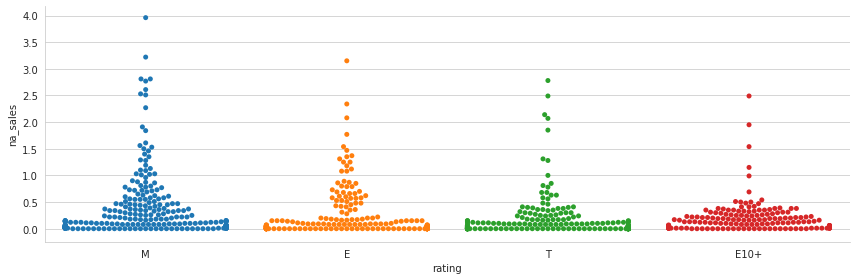

Самые популярные 5 игр по: rating для na_sales
---------------------------------------------
            mean   median    count      sum
        na_sales na_sales na_sales na_sales
rating                                     
M       0.363849     0.12      265    96.42
E       0.231689     0.05      219    50.74
T       0.143727     0.03      271    38.95
E10+    0.179622     0.10      185    33.23


-----------------------------------------------------------------------------------


Распределение:  rating по eu_sales


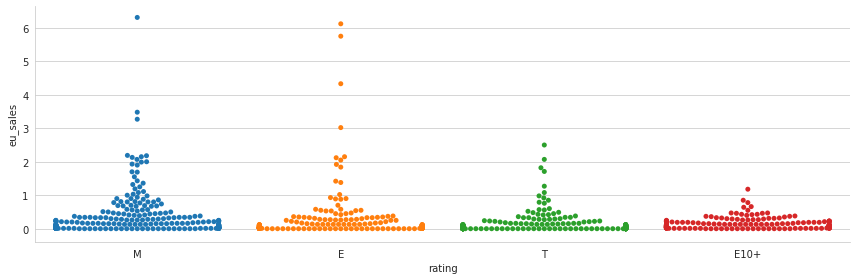

Самые популярные 5 игр по: rating для eu_sales
---------------------------------------------
            mean   median    count      sum
        eu_sales eu_sales eu_sales eu_sales
rating                                     
M       0.352604     0.12      265    93.44
E       0.265114     0.05      219    58.06
T       0.125720     0.04      271    34.07
E10+    0.141405     0.09      185    26.16


-----------------------------------------------------------------------------------


Распределение:  rating по jp_sales


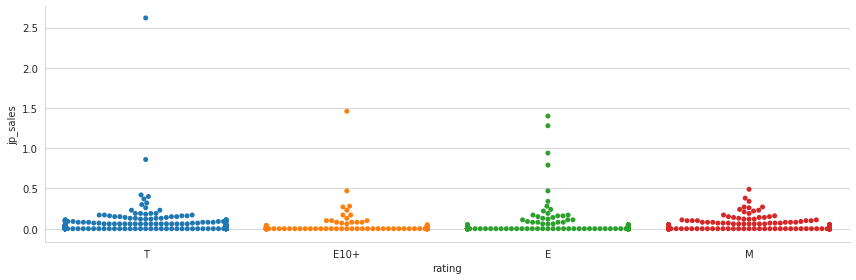

Самые популярные 5 игр по: rating для jp_sales
---------------------------------------------
            mean   median    count      sum
        jp_sales jp_sales jp_sales jp_sales
rating                                     
T       0.054539     0.01      271    14.78
E       0.040822     0.00      219     8.94
M       0.030226     0.00      265     8.01
E10+    0.024108     0.00      185     4.46


-----------------------------------------------------------------------------------




In [51]:
raitings = [('rating', 'na_sales'), ('rating', 'eu_sales'), ('rating', 'jp_sales')]
for pair in raitings:
    list_popular(*pair)

Популярные рейтинги:  
«E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше;
«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше.
«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет.
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  


В Японии популярны игры сегмента для подростков. Далее, для всех и для взрослых.  
На европейском и североамериканском рынках преобладают игры категори "M", потом для всех, и для всех от 10 лет.

<font color='green'>Прекрасно.

<div style="background: #deabbc">
    В блоке заданий 4 были сомнения, по какому критерию выбирать топ-5.
    <br/>
    По общей сумме, или по среднему/медиане? 
    <br/>
    Или как-то более изысканно
</div>

<b><font color='blue'>Имеет значение и то и другое, смотря с какой стороны посмотреть. Хорошо указать и самые успешные жанры в сумме и по отдельности.

## 5. Проверить гипотезы

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Чтобы проверить, различаются ли рейтинги проведем тест, приняв за нулевую гипотезу, гипотезу о равенстве, то есть: Пользовательские рейтинги для платформ Xbox One и PC одинаковые. Альтернативная гипотеза -- эти рейтинги отличаются. Возьмем выборку с того, периода, котрый считаем актуальным, с 2014 года.

In [52]:
(actual_games
 .pivot_table(index='platform', values='user_score', aggfunc=['median', 'mean', 'std']))

,median,mean,std
,user_score,user_score,user_score
platform,,,
3DS,6.8,5.165790,3.457226
PC,6.8,6.050394,2.073218
PS3,5.9,4.911667,2.874144
PS4,7.1,6.662903,1.736345
PSV,7.8,6.986250,2.418481
Wii,0.0,1.411111,2.981797
WiiU,7.0,6.418868,2.491297
X360,5.7,5.206522,2.367584


Посмотрим на распределение рейтингов

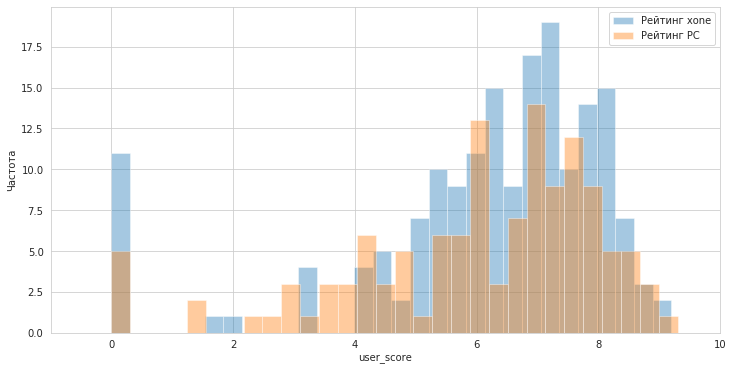

In [53]:
new_xone = actual_games.query('platform == "XOne"')['user_score'].dropna()
new_pc = actual_games.query('platform == "PC"')['user_score'].dropna()

def hist_comparer(data1, data2, limit, bin_q, label1, label2):
    plt.figure(figsize=(12,6))
    ax = (sns.distplot(data1,
               bins=bin_q, kde=False, label=label1))
    (sns.distplot(data2,
               bins=bin_q, label=label2, kde=False, ax=ax))
    ax.set(ylabel='Частота')
    plt.xlim(limit)
    plt.legend()
    
hist_comparer(new_xone, new_pc, (-1, 10), 30, 'Рейтинг xone', 'Рейтинг PC')

У XOne и PC довольно близкий медианный рейтинг и отклонение. Проведем t-test, примем уровень значимости 0.05

In [54]:
xone_pc = (st.ttest_ind(new_xone, new_pc))
xone_pc.pvalue

0.5858351465426549

p-value больше критического уровня значимости, значит мы принимаем нулевую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### 5.2. Средние пользовательские рейтинги жанров Action  и Sports разные.
Для проведения теста примем за нулевую гипотезу гипотезу о равенстве: Средние пользовательские рейтинги жанров Action  и Sports равны. Возьмем уровень значимости 0.05

In [55]:
actual_games.pivot_table(index='genre', values='user_score', aggfunc=['median', 'mean', 'std'])

,median,mean,std
,user_score,user_score,user_score
genre,,,
Action,6.80,5.958160,2.543186
Adventure,7.35,6.269643,2.996296
Fighting,7.40,6.625641,2.039055
Misc,6.60,5.390566,3.144792
Platform,7.10,5.924242,2.791844
Puzzle,3.70,3.987500,4.281668
Racing,6.35,5.975926,2.127354
Role-Playing,7.60,7.348571,1.317567


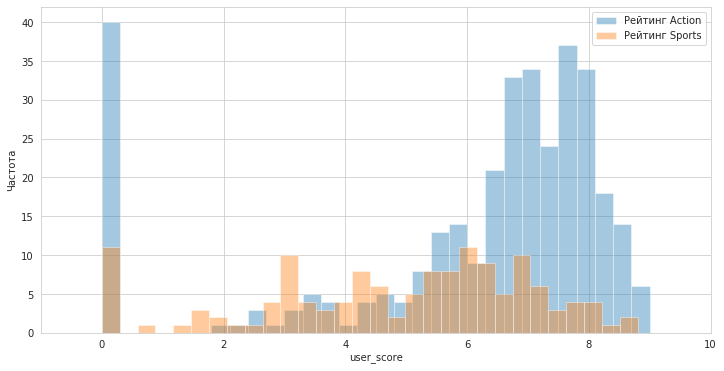

In [56]:
new_action = actual_games.query('genre == "Action"')['user_score'].dropna()
new_sports = actual_games.query('genre == "Sports"')['user_score'].dropna()
    
hist_comparer(new_action, new_sports, (-1, 10), 30, 'Рейтинг Action', 'Рейтинг Sports')

Распределения визуально отличаются, однако отклонение у рейтингов спорта и экшена похоже.

In [57]:
action_sports = (st.ttest_ind(new_action, new_sports))
action_sports.pvalue

9.920162756978418e-06

Примерно 9 в 10 в -6 степени, меньше критического уровня, значит нулевую гипотезу отвергаем, значит средние пользовательские рейтинги жанров Action и Sports разные

<font color='green'>Гипотезы сформулированы и проверены верно.

## 6. Выводы

Целью исследования было спрогонозировать потенцияльно популярный продукт на 2017 год, для интеренет магазина, продающего компьютерные игры по всему миру.  
В первую очередь нужно отметить, что глобальный рынок платформенных компьютерных игр, находится на 2016 год в стостоянии, когда прежде популярные платформы уже пережили свой пик, продажи игр на них идут на спад.

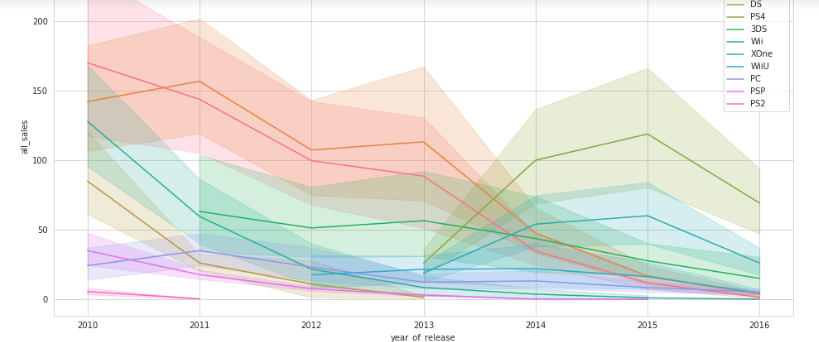
По примеру предыдущих периодов, это, возможно, то время, когда появятся новые платформы. Что-то придет на замену ps4, нинтендо 3ds и xbox one. От этих проихзводителей стоит ждать новых выпусков.  

И так, пока что лидирующие платформы: ps4 (пожалуй, самый крупный игрок), 3ds, xone. Распределение продаж по этим платформам имеет инетересную особенность: как правило существует большое количество игр, котрые не приносят много продаж. Но есть "звезды", у которых продажи одной игры могут достигать 14 миллионов. магазину стоит сосрежоточиться на таких популярных выпусках. Следить за анонсами, возможно выйдет очередная вариация call of duty)

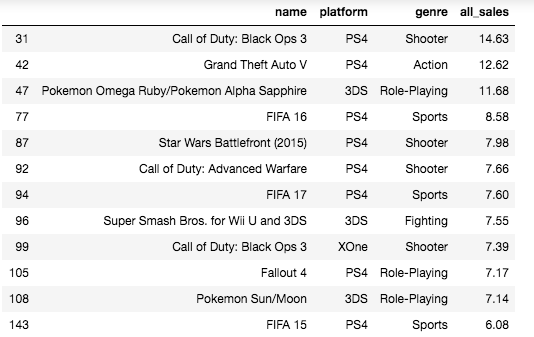

На продажи игр в популярных платформах не оказывает влияние рейтинг пользователей, да и с рейтингом критиков слабая, но полодительная корреляция.  
В распределении жанров по глобальному рынку лидируют шутеры и экшен. Причем в среднем стоимость шутера больше, а производство экшенов гораздобольше по количеству.  
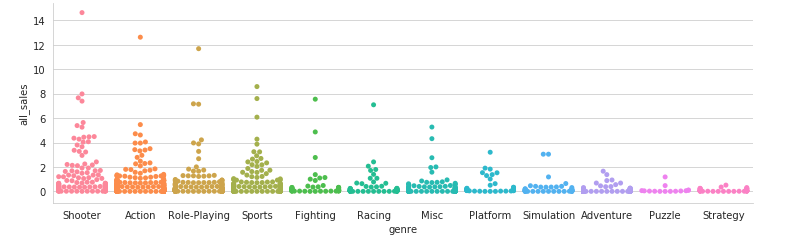

Что касается распределения по регионам, то как и ожидалось в Японии приобладает платформа Нинтендо, в Европе и Америке ps4. Так что, строя прогнозы на 2017 год регионально, для Японии следует следить за платформой ее производства. Та же в Европе и Америке популярен xbox.  
В жанрах на японском рынке лидирует role-playing, на Нинтендо как раз выпускаются игры такого жанра: pockemon, fallout 4. Гораздо меньше популярны шутеры. На европейском и американском рынке превалируют шутеры и экшн. В Европе следует уделить внимание еще и жанру sports.  
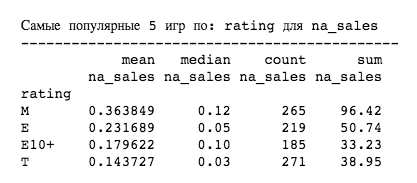
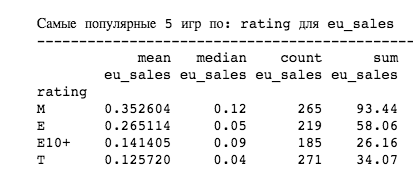
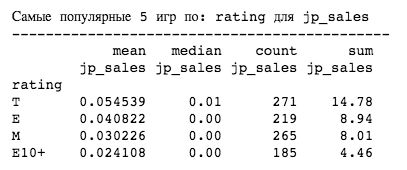



Согласно распределению по возрастному рейтингу для Японии стоит выбирать role-playing игры с рейтингом для подростков, в Америке и Европе экшнн, шутеры категории M и sports категории для всех.


<font color='blue'>Что же, работу могу только похвалить, по итогу сборного проекта видно, что у тебя  большой птенциал. Ты уверенно пользуешься pandas, смотришь глубоко в суть данных, умеешь находить инсайты. Не могу не похвалить за применение seaborn и за красивую автоматизацию построения графиков. Твоя работа не содержит критических ошибок, но, так как время не поджимает, я пошлю тебе ее ознакомиться с моими немногочисленными замечаниями и немного доработать.

<font color='blue'>Ок, отлично доработали, удачи в следующем модуле!